# Airbnb

## Context and objectives

Your have been missioned by the CEO of Airbnb Spain to analyze accommodations park in Madrid. More specifically, you are going to investigate the price of Airbnb accommodations in Madrid from April 2021 to April 2022.

## The database

### Download

Download the database in the `db` directory:

In [1]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification/airbnb_profits_analysis/airbnb.sqlite > db/airbnb.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  306M  100  306M    0     0  19.9M      0  0:00:15  0:00:15 --:--:-- 20.4M


Check the database has been saved:

In [2]:
!tree

.
├── Makefile
├── README.md
├── airbnb.ipynb
├── data
├── db
│   └── airbnb.sqlite
└── tests
    └── __init__.py

3 directories, 5 files


### Schema

Open the database with your favorite tool (DBeaver, sqlite3, Postico,...) then:
- **📝 Draw the database schema in Le Wagon editor on https://kitt.lewagon.com/db**
- **💾 Save the `XML` version of the database schema in a `db/airbnb.xml` file**

Once done, check you have the `airbnb.xml` file in the `db` directory:

!tree

### Querying the database

In order to perform some analysis, you need to fetch the following information from **all** the accommodations of the database:
- `id`: the unique identifier of the accommodation
- `price`: the value paid per night in USD
- `neighbourhood`: the neighbourhood the accommodation belongs to
- `neighbourhood_group`: the neighbourhoods group the accommodation belongs to
- `bedrooms`: the number of bedrooms 
- `beds`: the number of beds
- `accommodates`: number of persons the accommodation is suited for
- `amenities`: a list of amenities of the accommodation
- `minimum_nights`: the minimum number of nights which can be booked
- `maximum_nights`: the maximum number of nights which can be booked in a row
- `host_id`: the unique identifier of the host
- `host_since`: date of the first listing of the host
- `host_neighbourhood`: the neighbourhood the accommodation belongs to
- `host_location`: the location of the host
- `host_response_time`: the category of response time of the host
- `host_response_rate`: the response rate of the host in %
- `host_acceptance_rate`: the acceptance rate of the host in %
- `host_is_superhost`: whether or not the host is a Superhost
- `host_has_profile_pic`: whether or not the host has a profile picture
- `host_identity_verified`: whether or not the identity of the host is verified
- `latitude`: latitude of the accommodation
- `longitude`: longitude of the accommodation
- `room_type`: category of the accommodation
- `property_type`: category of the property the accommodation belongs to
- `review_scores_rating`: average score rating for the accommodation in %
- `number_of_reviews`: total number of reviews
- `yearly_availability`: the total number of days where the accommodation available for guests in a year

**📝 Write an SQL query to fetch the above information and store it as a `str` in the `query` variable.**

In [1]:
query="""
    WITH count_available AS (
	SELECT 
		a.id,
		COUNT(a2.available) as yearly_availability
		FROM accommodations a 
		LEFT JOIN availabilities a2 ON a.id = a2.accommodation_id 
        WHERE a2.available=="t"
		GROUP BY a.id
)
SELECT 
	a.id,
	a.price,
	n.name AS neighbourhood,
	ng.name AS neighbourhood_group,
	a.bedrooms,
	a.beds,
	a.accommodates,
	a.amenities ,
	a.minimum_nights,
	a.maximum_nights,
	a.host_id,
	a.host_since,
	a.host_neighbourhood,
	a.host_location,
	a.host_response_time,
	a.host_response_rate,
	a.host_acceptance_rate,
	a.host_is_superhost,
	a.host_has_profile_pic,
	a.host_identity_verified,
	a.latitude,
	a.longitude,
	a.room_type,
	a.property_type,
	a.review_scores_rating,
	COUNT(r.id) AS number_of_reviews,
	count_available.yearly_availability
FROM accommodations a
JOIN neighbourhoods n ON n.id = a.neighbourhood_id 
JOIN neighbourhood_groups ng on ng.id = n.neighbourhood_group_id 
LEFT JOIN count_available ON count_available.id=a.id
LEFT JOIN reviews r ON a.id=r.accommodation_id
GROUP BY a.id 
"""

**📝 Connect to the `airbnb.sqlite` database and use the query above to store the data in a `DataFrame` named `data`. Display the 10 first rows**

In [3]:
import sqlite3
import pandas as pd 

conn = sqlite3.connect('db/airbnb.sqlite')

data = pd.read_sql(query, conn)

In [4]:
data.head(10)

,id,price,neighbourhood,neighbourhood_group,bedrooms,beds,accommodates,amenities,minimum_nights,maximum_nights,...,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,property_type,review_scores_rating,number_of_reviews,yearly_availability
0,6369,$60.00,Hispanoamérica,Chamartín,1.0,1.0,2,"[""Kitchen"", ""Elevator"", ""Extra pillows and bla...",1,1125,...,t,t,t,40.45724,-3.67688,Private room,Private room in apartment,98.0,78,180.0
1,21853,$31.00,Cármenes,Latina,1.0,1.0,1,"[""Bed linens"", ""Refrigerator"", ""Dishes and sil...",4,40,...,f,t,t,40.40381,-3.74130,Private room,Private room in apartment,92.0,33,364.0
2,23001,$50.00,Legazpi,Arganzuela,3.0,5.0,6,"[""Pool"", ""Dishwasher"", ""Bed linens"", ""Refriger...",15,730,...,f,t,t,40.38840,-3.69511,Entire home/apt,Entire apartment,NaN,0,366.0
3,24805,$92.00,Universidad,Centro,NaN,1.0,3,"[""Refrigerator"", ""Host greets you"", ""Dishes an...",5,730,...,f,t,f,40.42183,-3.70529,Entire home/apt,Entire apartment,98.0,10,72.0
4,26825,$26.00,Legazpi,Arganzuela,1.0,1.0,1,"[""Elevator"", ""Patio or balcony"", ""Bed linens"",...",2,1125,...,f,t,t,40.38975,-3.69018,Private room,Private room in house,94.0,149,365.0
5,28200,$85.00,Legazpi,Arganzuela,3.0,4.0,6,"[""TV with standard cable"", ""Kitchen"", ""Elevato...",1,365,...,f,t,t,40.38860,-3.69492,Entire home/apt,Entire apartment,80.0,3,365.0
6,30320,$65.00,Sol,Centro,1.0,2.0,2,"[""TV with standard cable"", ""Heating"", ""Air con...",5,180,...,f,t,f,40.41476,-3.70418,Entire home/apt,Entire apartment,93.0,170,351.0
7,30959,$54.00,Embajadores,Centro,1.0,1.0,2,"[""TV with standard cable"", ""Kitchen"", ""Elevato...",3,730,...,f,t,f,40.41259,-3.70105,Entire home/apt,Entire loft,88.0,8,NaN
8,37859,"$1,400.00",Palacio,Centro,2.0,3.0,5,"[""Kitchen"", ""Elevator"", ""Dryer"", ""Iron"", ""Wifi...",3,730,...,t,t,t,40.41844,-3.71073,Entire home/apt,Entire apartment,NaN,0,365.0
9,40718,$79.00,Justicia,Centro,1.0,2.0,4,"[""Bed linens"", ""Refrigerator"", ""Crib"", ""Dishes...",3,500,...,t,t,t,40.41969,-3.69736,Entire home/apt,Entire apartment,93.0,118,302.0


### 💾 Save your results

Run the cell below to save your results.

In [5]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'query',
    query=query,
    shape=data.shape,
    columns=data.columns,
    host_locations=data['host_location'].unique(),
    maximums=data.max(axis=0),
    minimums=data.min(axis=0),
    means=data.mean(axis=0)
)
result.write()

/var/folders/fj/f_4gtmfs5ld3sk68p4bh9cr40000gn/T/ipykernel_18586/3634933146.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maximums=data.max(axis=0),
/var/folders/fj/f_4gtmfs5ld3sk68p4bh9cr40000gn/T/ipykernel_18586/3634933146.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minimums=data.min(axis=0),
/var/folders/fj/f_4gtmfs5ld3sk68p4bh9cr40000gn/T/ipykernel_18586/3634933146.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means=data.mean(axis=0)


### Load data from a CSV file

We provide you a clean dataset you should start withto perform your analysis:

**📝 Load the data from this URL: https://wagon-public-datasets.s3.amazonaws.com/certification/airbnb_profits_analysis/airbnb.csv inside a `DataFrame` named `accommodations`. Display the 10 first rows.** 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
accomodations=pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/airbnb_profits_analysis/airbnb.csv")

In [8]:
accomodations.head()

,id,price,neighbourhood,neighbourhood_group,bedrooms,beds,accommodates,amenities,minimum_nights,maximum_nights,...,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,property_type,review_scores_rating,number_of_reviews,yearly_availability
0,6369,$60.00,Hispanoamérica,Chamartín,1.0,1.0,2,"[""Kitchen"", ""Elevator"", ""Extra pillows and bla...",1,1125,...,t,t,t,40.45724,-3.67688,Private room,Private room in apartment,98.0,78,180.0
1,21853,$31.00,Cármenes,Latina,1.0,1.0,1,"[""Bed linens"", ""Refrigerator"", ""Dishes and sil...",4,40,...,f,t,t,40.40381,-3.74130,Private room,Private room in apartment,92.0,33,364.0
2,23001,$50.00,Legazpi,Arganzuela,3.0,5.0,6,"[""Pool"", ""Dishwasher"", ""Bed linens"", ""Refriger...",15,730,...,f,t,t,40.38840,-3.69511,Entire home/apt,Entire apartment,NaN,0,366.0
3,26825,$26.00,Legazpi,Arganzuela,1.0,1.0,1,"[""Elevator"", ""Patio or balcony"", ""Bed linens"",...",2,1125,...,f,t,t,40.38975,-3.69018,Private room,Private room in house,94.0,149,365.0
4,28200,$85.00,Legazpi,Arganzuela,3.0,4.0,6,"[""TV with standard cable"", ""Kitchen"", ""Elevato...",1,365,...,f,t,t,40.38860,-3.69492,Entire home/apt,Entire apartment,80.0,3,365.0


In [65]:
accomodations.neighbourhood.value_counts()

Embajadores      2081
Universidad      1680
Palacio          1364
Sol               982
Justicia          881
                 ... 
Fuentelareina       5
Valdemarín          5
El Pardo            3
Horcajo             1
Atalaya             1
Name: neighbourhood, Length: 128, dtype: int64

## Exploratory analysis

In this section, explore the dataset and visualize the data to get some intuitions.

In particular, try to make a sense of the relationships between the price of an accommodation and its characteristics.


ℹ️ We are **not** waiting for multivariate analysis at this point (using the `statsmodels` package)

### Conversion du prix en float

In [9]:
accomodations['price'] = [s.replace("$", "") for s in accomodations['price']]
accomodations['price'] = [s.replace(",", "") for s in accomodations['price']]
accomodations['price'] = accomodations['price'].astype(float)

In [10]:
accomodations.dtypes

id                          int64
price                     float64
neighbourhood              object
neighbourhood_group        object
bedrooms                  float64
beds                      float64
accommodates                int64
amenities                  object
minimum_nights              int64
maximum_nights              int64
host_id                     int64
host_since                 object
host_neighbourhood         object
host_location              object
host_response_time         object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_has_profile_pic       object
host_identity_verified     object
latitude                  float64
longitude                 float64
room_type                  object
property_type              object
review_scores_rating      float64
number_of_reviews           int64
yearly_availability       float64
dtype: object

### Description rapide

In [11]:
accomodations.describe().applymap(lambda x: round(x))

,id,price,bedrooms,beds,accommodates,minimum_nights,maximum_nights,host_id,latitude,longitude,review_scores_rating,number_of_reviews,yearly_availability
count,17747,17747,17747,17747,17747,17747,17747,17747,17747,17747,12562,17747,13190
mean,28650152,132,1,2,3,7,737,127237499,40,-4,93,32,227
std,13468279,492,1,2,2,34,1393,114830724,0,0,10,63,120
min,6369,8,1,0,1,1,1,7952,40,-4,20,0,1
25%,18662000,35,1,1,2,1,90,26154003,40,-4,90,0,104
50%,31072229,60,1,2,2,2,1125,96025379,40,-4,95,5,239
75%,40225288,100,2,3,4,3,1125,218234159,40,-4,99,32,357
max,49187471,9999,15,50,16,1125,142365,396428081,41,-4,100,648,367


In [43]:
accomodations.isnull().sum()

id                           0
price                        0
neighbourhood                0
neighbourhood_group          0
bedrooms                     0
beds                         0
accommodates                 0
amenities                    0
minimum_nights               0
maximum_nights               0
host_id                      0
host_since                 479
host_neighbourhood        6142
host_location              518
host_response_time        7705
host_response_rate        7705
host_acceptance_rate      7805
host_is_superhost          479
host_has_profile_pic       479
host_identity_verified     479
latitude                     0
longitude                    0
room_type                    0
property_type                0
review_scores_rating      5185
number_of_reviews            0
yearly_availability       4557
log_price                    0
dtype: int64

De nombreux NA sont présents mais ils ne devraient pas poser de problèmes dans les analyses que nous allons faire par la suite.

### Distribution du prix

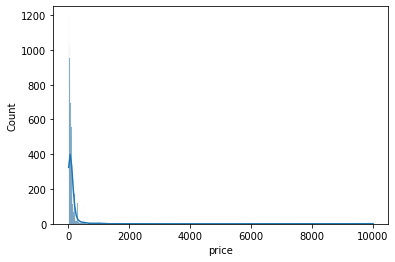

In [12]:
sns.histplot(accomodations.price,kde=True);

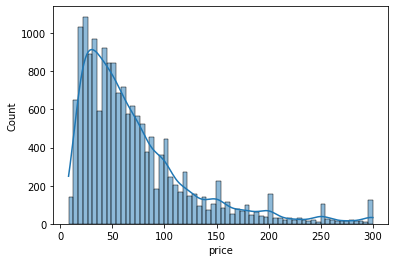

In [13]:
sns.histplot(accomodations.loc[accomodations["price"]<=300,"price"],kde=True);

Pour la suite des représentations graphiques nous allons utiliser le log du prix.

In [14]:
accomodations['log_price']=np.log(accomodations['price'])

### Etude des corrélations

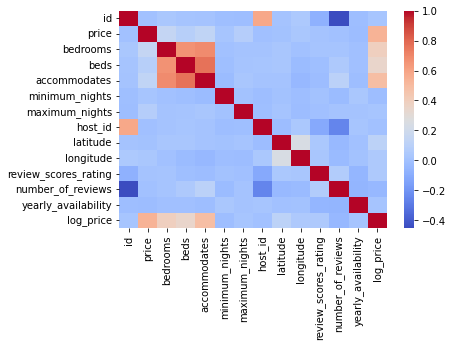

In [15]:
sns.heatmap(accomodations.corr(),cmap='coolwarm');

### Etude des variables (théoriquement) quantitatives

__Nombre de chambres__

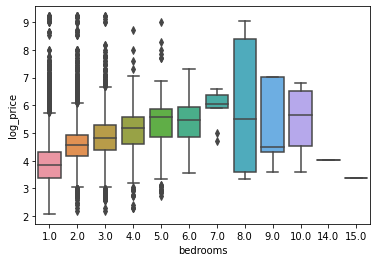

In [16]:
sns.boxplot(x=accomodations.bedrooms,y=accomodations.log_price);

__Nombre de personnes pouvant être accueilli__

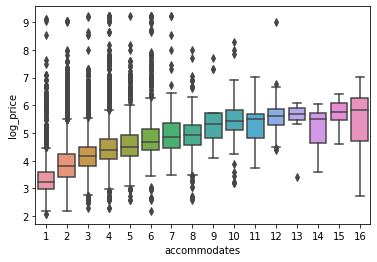

In [17]:
sns.boxplot(x=accomodations.accommodates,y=accomodations.log_price);

__Evaluation__

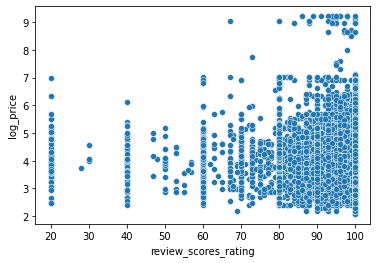

In [18]:
sns.scatterplot(x=accomodations.review_scores_rating,y=accomodations.log_price);

__Nombre d'évaluations__

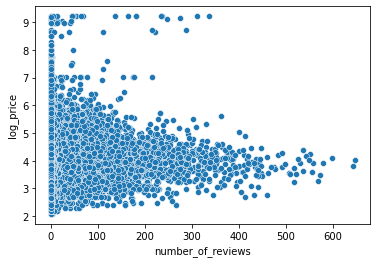

In [19]:
sns.scatterplot(x=accomodations.number_of_reviews,y=accomodations.log_price);

### Etude des variables qualitatives

__Groupe du voisinage__

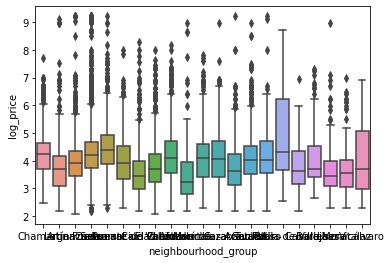

In [20]:
sns.boxplot(x=accomodations.neighbourhood_group,y=accomodations.log_price);

__Temps de réponse__

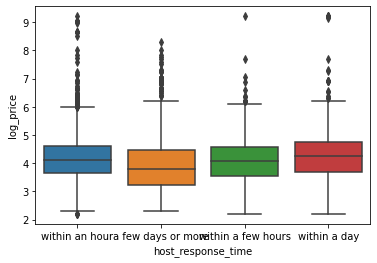

In [21]:
sns.boxplot(x=accomodations.host_response_time,y=accomodations.log_price);

__Superhost__

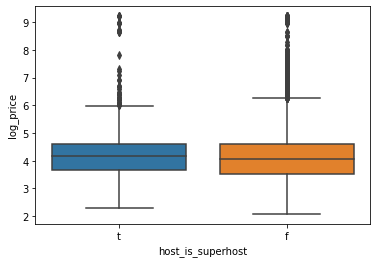

In [22]:
sns.boxplot(x=accomodations.host_is_superhost,y=accomodations.log_price);

__Photo de profil__

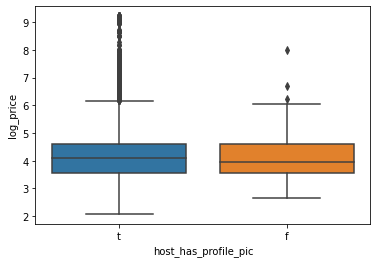

In [23]:
sns.boxplot(x=accomodations.host_has_profile_pic,y=accomodations.log_price);

__Identité vérifiée__

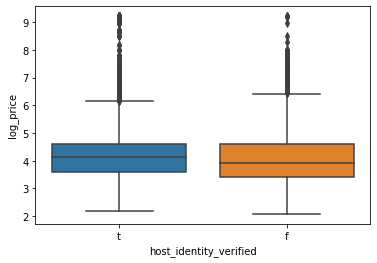

In [24]:
sns.boxplot(x=accomodations.host_identity_verified,y=accomodations.log_price);

__Type de chambre__

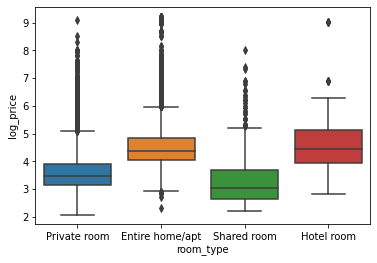

In [25]:
sns.boxplot(x=accomodations.room_type,y=accomodations.log_price);

__Type de logement auquel la chambre appartient__

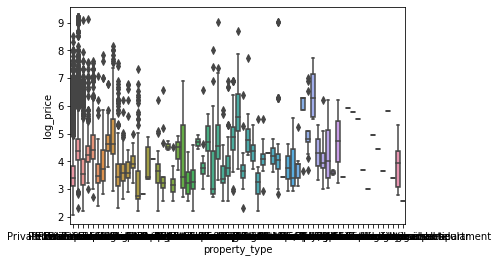

In [26]:
sns.boxplot(x=accomodations.property_type,y=accomodations.log_price);

## Statistical analysis

These analysis can help you to forge your presentation but you are **strongly encouraged** to follow your own findings.

### Hotel room statistics

The Airbnb team is really interested in the **Hotel rooms** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **Hotel rooms vs the rest**.

In [27]:
hotel_price=accomodations.loc[accomodations["room_type"]=="Hotel room","log_price"]
rest_price=accomodations.loc[accomodations["room_type"]!="Hotel room","log_price"]

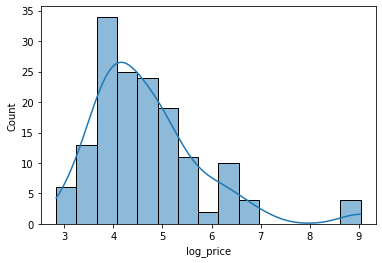

In [28]:
sns.histplot(hotel_price,kde=True);

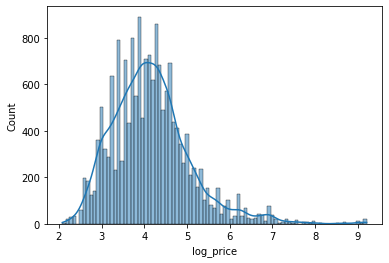

In [29]:
sns.histplot(rest_price,kde=True);

**❓ Using a statistical test, can you tell than Hotel rooms are statistically more expensive than the other rooms?**

Store the $p\text{-}value$ of your test inside a `p_value` variable.

In [30]:
from scipy.stats import mannwhitneyu

stats,p_value=mannwhitneyu(hotel_price,rest_price)

In [31]:
p_value

2.931447040891254e-09

Différences statistiques entre les deux distributions. Les chambres d'hotel sont statistiquement plus chères.

### Price room analysis

**❓ Plot the distribution of the prices?**

ℹ️ Use the accommodations with price lower than $200 for a better visualization

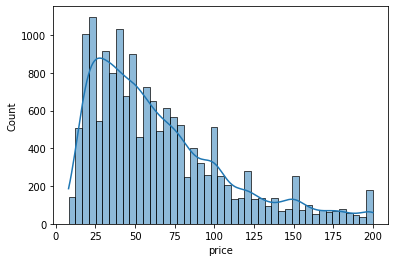

In [32]:
sns.histplot(accomodations.loc[accomodations["price"]<=200,"price"],kde=True);

**❓ What do think about that distribution?**

Distribution log normale

**📝 What transformation would you use to the price to fit a linear model? Transform your target as you see fit.**

Après étude de la distribution du prix, j'utiliserais une transformation log.

In [165]:
# accomodations['log_price']=np.log(accomodations['price']) --> Deja fait précédemment

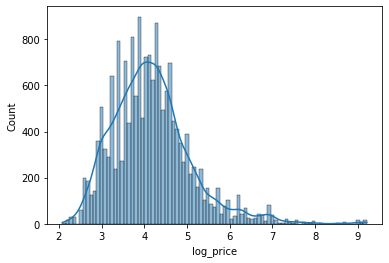

In [33]:
sns.histplot(accomodations["log_price"],kde=True);


**❓ Can we explain the price for a customer with our features?**

Using the numerical and the categorical features of your choice, try to fit a not too complex model to explain the price of an accommodation.

Store the `summary` of the model inside a `model_summary` variable.

In [34]:
import statsmodels.formula.api as smf

In [35]:
formula="log_price~bedrooms+room_type+accommodates+number_of_reviews+review_scores_rating+yearly_availability"

In [36]:
model = smf.ols(formula=formula, data=accomodations).fit()

In [37]:
model_summary=model.summary()

In [38]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1142.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:03:27   Log-Likelihood:                -8085.5
No. Observations:                9508   AIC:                         1.619e+04
Df Residuals:                    9499   BIC:                         1.625e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3235      0.058     56.901      0.000       3.209       3.438
room_type[T.Hotel room]       0.1875      0.064      2.921      0.003       0.062       0.313
room_type[T.Private room]    -0.6659      0.015    -43.843      0.000      -0.696      -0.636
room_type[T.Shared room]     -1.0878      0.046    -23.396      0.000      -1.179      -0.997
bedrooms                      0.1352      0.010     13.644      0.000       0.116       0.155
accommodates                  0.1061      0.005     23.474      0.000       0.097       0.115
number_of_reviews            -0.0011   7.75e-05    -14.668      0.000      -0.001      -0.001
review_scores_rating          0.0051      0.001      8.731      0.000       0.004       0.006
yearly_availability           0.0002   4.87e-05      3.597      0.000    7.96e-05       0.000
==============================================================================
Omnibus:                     5078.899   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76854.465
Skew:                           2.219   Prob(JB):                         0.00
Kurtosis:                      16.202   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**❓ What features explain the best the price of an accommodation in Madrid?**
- Which ones are the most statistically significant?
- Which numerical feature is the most sensitive to the price?

Tous les coefficients semblent statistiquement significants (p-value =0 ou proche). Cependant, la feature Private room semble avoir le t le plus élevé (en terme de valeur absolue).

Le nombre de chambre (bedrooms) semble être la feature numérique la plus influente du prix (coeff le plus élevé).

**❓ Explain with your own words the impact of an increase of one unity of the feature of your choice on the price of an accommodation.**

Prenons l'exemple du `review_scores_rating`, en gardant tous les autres paramètres fixés, une augmentation de 1 de ce score augmente le log du prix de 0.0048 dollars.

**❓ Are you satisfied with your model? Why?**

Oui et non. 

Point positif : les coefficients des features choisies sont tous statistiquement significatifs (par P>|t| et par prob du F-stat). 

Point négatif : le R2 du modèle est relativement faible (0.49).Le `condition number` est élevé : multicolinéarités ?

**❓Are you confident in the p-values of your model?**

In [39]:
predicted_prices = model.predict(accomodations[['bedrooms','room_type','accommodates','number_of_reviews','review_scores_rating','yearly_availability']])
residuals = predicted_prices - accomodations['log_price']

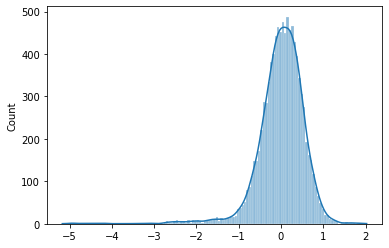

In [40]:
sns.histplot(residuals, kde=True, edgecolor='w');

Text(0, 0.5, 'Residual log prices')

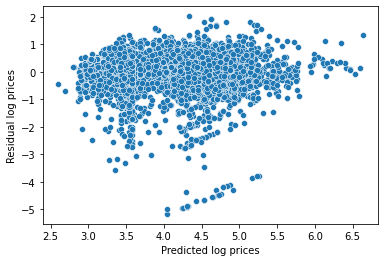

In [41]:
sns.scatterplot(x=predicted_prices, y=residuals)
plt.xlabel('Predicted log prices')
plt.ylabel('Residual log prices')

Je n'ai pas totalement confience dans les p-values de mon modèle. Les résidus ne sont pas tout à fait normalement distribués et il n'y a pas d'homoscédasticité.

### 💾 Save your results

Run the cell below to save your results.

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('analysis', p_value=p_value, model_summary=str(model_summary))
result.write()

## CEO question

> **How can we increase the average rating of the accommodations in Madrid to 95% while keeping the revenue as high as possible?**

[BONUS] In addition could you give some advices / quick wins to Airbnb Hosts Team in order to help hosts increasing their accommodation price while onboarding on the platform.

⚠️ We suppose for this study that: 
- An accommodation is booked **60%** of the available time
- Airbnb takes a **5% fee** on the revenue per accommodation
- The actions you will recommend have a _negligible impact_ on the actual charges of Airbnb

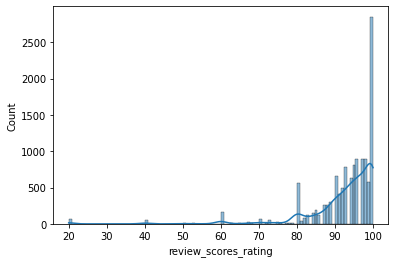

In [41]:
sns.histplot(accomodations.review_scores_rating,kde=True);

### Perte des moins biens notés

In [68]:
perte=accomodations.loc[accomodations["review_scores_rating"]<80,["price","yearly_availability"]]

In [69]:
perte.dropna(inplace=True)

In [74]:
sum(round(perte["yearly_availability"]*0.6)*(perte["price"]*0.05))

277686.05000000005

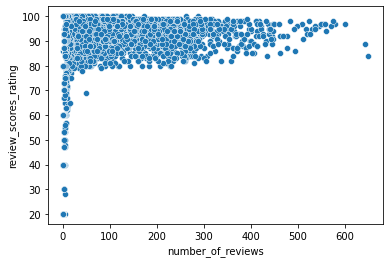

In [42]:
sns.scatterplot(x=accomodations.number_of_reviews,y=accomodations.review_scores_rating);

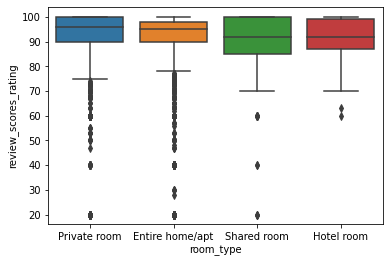

In [43]:
sns.boxplot(x=accomodations.room_type,y=accomodations.review_scores_rating);

In [44]:
accomodations["host_since"]=pd.to_datetime(accomodations["host_since"],format="%Y-%m-%d")

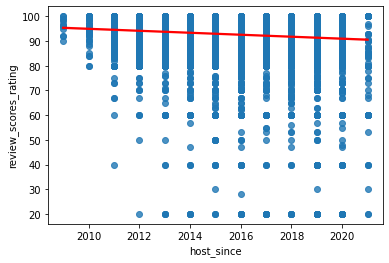

In [45]:
sns.regplot(x=accomodations.host_since.dt.year,y=accomodations.review_scores_rating,line_kws={'color': 'red'});

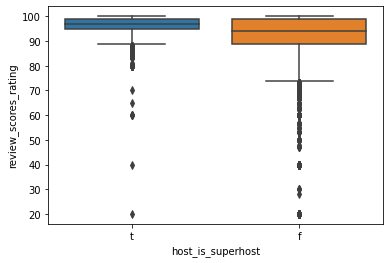

In [46]:
sns.boxplot(x=accomodations.host_is_superhost,y=accomodations.review_scores_rating);

## Presentation

Based on the analysis of the `accommodations` dataset, prepare a slides deck to present your conclusions to the CEO of Airbnb Spain. The presentation must contain **5 slides maximum** (including the title slide). 

💡 The CEO is in fond of illustrations, figures and statistics.


ℹ️ You may follow the [pyramid principle](https://gettingbettereveryday.org/2018/10/05/what-you-could-learn-from-barbra-mintos-the-pyramid-principle-2009-172-pages/) with an inductive approach, actions first!


⚠️ Save your presentation at the root of the repository.

🚀 You turn!